In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
trip_data = pd.read_csv('trip_data.csv')

# Filter Data

In [141]:

# Alternatively, you can use the IQR method
Q1 = trip_data['travel_time'].quantile(0.1)
Q3 = trip_data['travel_time'].quantile(0.9)
IQR = Q3 - Q1

# Set a multiplier for IQR to identify outliers
iqr_multiplier = 1.5

# Filter out rows with values outside the IQR range
filtered_trip_data_iqr = trip_data[(trip_data['travel_time'] >= Q1 - iqr_multiplier * IQR) & (trip_data['travel_time'] <= Q3 + iqr_multiplier * IQR)]

filtered_trip_data_iqr.shape


(1061, 8)

In [142]:
trip_data = trip_data[trip_data['travel_time'] < 120]
trip_data = trip_data[trip_data['dwell_time'] < 100]

In [143]:
# trip_data = filtered_trip_data_iqr

In [144]:
trip_data.head()

,trip_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time
0,1,2021-10-01,07:31:27,08:15:31,BT02,BT01,44.066667,5.466667
1,2,2021-10-01,09:12:10,10:00:55,BT01,BT02,48.750000,2.366667
2,3,2021-10-01,10:42:10,11:32:30,BT02,BT01,50.333333,9.283333
3,4,2021-10-01,12:23:09,13:15:46,BT01,BT02,52.616667,9.183333
4,5,2021-10-01,16:59:16,18:17:15,BT02,BT01,77.983333,25.566667


In [145]:
trip_data.shape

(1077, 8)

# Add more features

In [146]:
trip_data['SITR'] = trip_data['dwell_time'] / trip_data['travel_time']

In [147]:
# add a new column for day of the week from the date column
# day of the week should be numbered 0-6, with 0 being Monday
trip_data['day_of_week'] = pd.to_datetime(trip_data['date']).dt.dayofweek

In [148]:
import pandas as pd

# Load your trip data DataFrame
# trip_data = pd.read_csv('your_trip_data.csv')

# Add a new column for day of the week from the date column
trip_data['day_name'] = pd.to_datetime(trip_data['date']).dt.day_name()

# Add a new column called time_of_day based on start_time
# where the time_of_day is rounded to the nearest quarter of an hour
# e.g. 12:07:00 would be 12:15:00
trip_data['hour_of_day'] = pd.to_datetime(trip_data['start_time']).dt.round('15min').dt.time

# Convert time_of_day to a floating point number of hours
# e.g. 12:15:00 would be 12.25
trip_data['hour_of_day'] = trip_data['hour_of_day'].apply(lambda x: x.hour + x.minute / 60)



In [149]:
trip_data['hour_of_day'] = trip_data['hour_of_day'].round(2)

In [150]:
# drop rows where count for hour_of_day is less than 10
trip_data = trip_data.groupby('hour_of_day').filter(lambda x : len(x)>10)
# drop rows where 'hour_of_day' is less than 6 and gretaer than 19
trip_data = trip_data[trip_data['hour_of_day'] >= 6]
trip_data = trip_data[trip_data['hour_of_day'] <= 20]

In [151]:
# add a new column for weekend or weekday from the day_of_week column
# 0 = weekday, 1 = weekend
trip_data['weekend'] = np.where(trip_data['day_of_week'] >= 5, 1, 0)

In [152]:
# add a new column for rush hour from the hour_of_day column
# 0 = not rush hour, 1 = rush hour
trip_data['rush_hour'] = np.where((trip_data['hour_of_day'] >= 7) & (trip_data['hour_of_day'] <= 9), 1, 0)
trip_data['rush_hour'] = np.where((trip_data['hour_of_day'] >= 16) & (trip_data['hour_of_day'] <= 18), 1, trip_data['rush_hour'])
trip_data['rush_hour'] = np.where((trip_data['hour_of_day'] >= 12) & (trip_data['hour_of_day'] <= 2), 1, trip_data['rush_hour'])

In [153]:
ninety_percentile = trip_data['travel_time'].quantile(0.9)
trip_data['excess_travel_time'] = trip_data['travel_time'] - ninety_percentile

In [154]:
trip_data

,trip_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time
0,1,2021-10-01,07:31:27,08:15:31,BT02,BT01,44.066667,5.466667,0.124054,4,Friday,7.50,0,1,-18.460000
1,2,2021-10-01,09:12:10,10:00:55,BT01,BT02,48.750000,2.366667,0.048547,4,Friday,9.25,0,0,-13.776667
2,3,2021-10-01,10:42:10,11:32:30,BT02,BT01,50.333333,9.283333,0.184437,4,Friday,10.75,0,0,-12.193333
3,4,2021-10-01,12:23:09,13:15:46,BT01,BT02,52.616667,9.183333,0.174533,4,Friday,12.50,0,0,-9.910000
4,5,2021-10-01,16:59:16,18:17:15,BT02,BT01,77.983333,25.566667,0.327848,4,Friday,17.00,0,1,15.456667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,1205,2022-10-03,09:10:59,09:48:35,BT02,BT01,37.600000,4.416667,0.117465,0,Monday,9.25,0,0,-24.926667
1107,1206,2022-10-03,10:41:21,11:21:02,BT01,BT02,39.683333,1.800000,0.045359,0,Monday,10.75,0,0,-22.843333
1108,1207,2022-10-03,14:10:53,14:50:32,BT02,BT01,39.650000,4.783333,0.120639,0,Monday,14.25,0,0,-22.876667
1109,1208,2022-10-03,15:40:58,16:31:20,BT01,BT02,50.366667,5.316667,0.105559,0,Monday,15.75,0,0,-12.160000


In [155]:
# change start_terminal and end_terminal if BT01 then kandy-digana and if BT02 then digana-kandy
trip_data['start_terminal'] = np.where(trip_data['start_terminal'] == 'BT01', 'Kandy', trip_data['start_terminal'])
trip_data['start_terminal'] = np.where(trip_data['start_terminal'] == 'BT02', 'Digana', trip_data['start_terminal'])
trip_data['end_terminal'] = np.where(trip_data['end_terminal'] == 'BT01', 'Kandy', trip_data['end_terminal'])
trip_data['end_terminal'] = np.where(trip_data['end_terminal'] == 'BT02', 'Digana', trip_data['end_terminal'])

In [156]:
trip_data['Direction'] = trip_data['start_terminal'] + '-' + trip_data['end_terminal']

In [157]:
trip_data

,trip_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time,Direction
0,1,2021-10-01,07:31:27,08:15:31,Digana,Kandy,44.066667,5.466667,0.124054,4,Friday,7.50,0,1,-18.460000,Digana-Kandy
1,2,2021-10-01,09:12:10,10:00:55,Kandy,Digana,48.750000,2.366667,0.048547,4,Friday,9.25,0,0,-13.776667,Kandy-Digana
2,3,2021-10-01,10:42:10,11:32:30,Digana,Kandy,50.333333,9.283333,0.184437,4,Friday,10.75,0,0,-12.193333,Digana-Kandy
3,4,2021-10-01,12:23:09,13:15:46,Kandy,Digana,52.616667,9.183333,0.174533,4,Friday,12.50,0,0,-9.910000,Kandy-Digana
4,5,2021-10-01,16:59:16,18:17:15,Digana,Kandy,77.983333,25.566667,0.327848,4,Friday,17.00,0,1,15.456667,Digana-Kandy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,1205,2022-10-03,09:10:59,09:48:35,Digana,Kandy,37.600000,4.416667,0.117465,0,Monday,9.25,0,0,-24.926667,Digana-Kandy
1107,1206,2022-10-03,10:41:21,11:21:02,Kandy,Digana,39.683333,1.800000,0.045359,0,Monday,10.75,0,0,-22.843333,Kandy-Digana
1108,1207,2022-10-03,14:10:53,14:50:32,Digana,Kandy,39.650000,4.783333,0.120639,0,Monday,14.25,0,0,-22.876667,Digana-Kandy
1109,1208,2022-10-03,15:40:58,16:31:20,Kandy,Digana,50.366667,5.316667,0.105559,0,Monday,15.75,0,0,-12.160000,Kandy-Digana


In [158]:
trip_data['hour_of_day'].value_counts()

10.75    35
16.75    34
15.75    34
8.25     32
9.25     29
12.25    29
11.25    29
7.75     28
16.25    28
7.25     26
8.75     25
14.25    25
17.00    25
12.50    25
11.75    25
15.25    22
8.50     21
14.75    21
15.50    20
8.00     20
17.75    20
7.50     20
12.00    19
13.75    19
15.00    18
9.50     18
12.75    18
17.25    18
10.25    17
10.00    16
9.75     16
9.00     16
13.25    16
6.75     15
11.00    15
10.50    14
17.50    14
6.25     13
16.00    13
11.50    13
14.50    13
19.50    12
18.00    12
18.50    11
Name: hour_of_day, dtype: int64

In [159]:
trip_data.shape

(909, 16)

In [160]:
trip_data.to_csv('history.csv', index=False)

# visualization

# use the history.csv for dashboard visualization.

# 1. 'Travel Time by Hour of the Day (Weekdays vs. Weekends)'

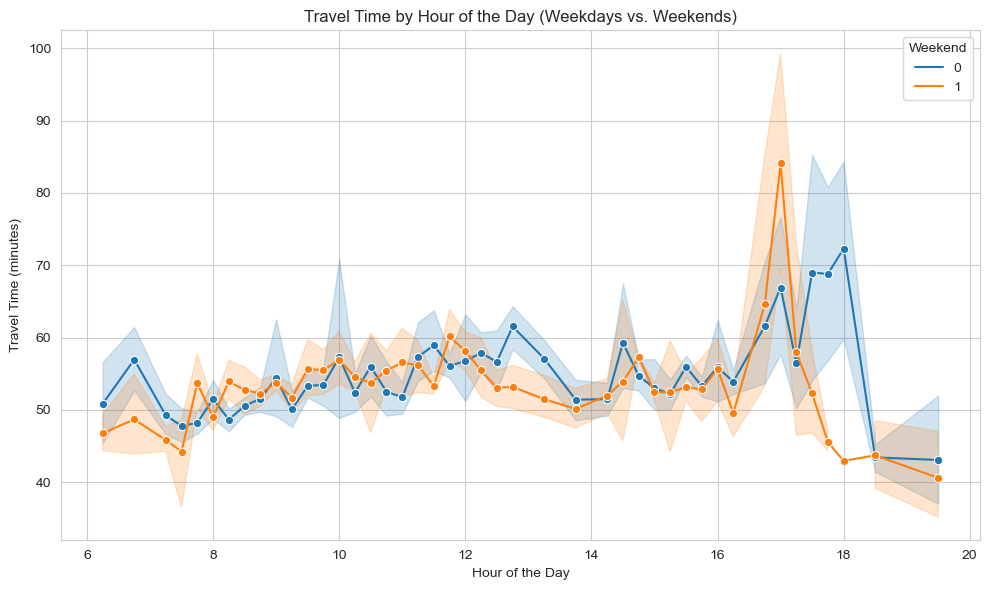

In [161]:
# Set the style of seaborn for better visualization
sns.set_style('whitegrid')

# Plot line graph with different colors for weekends and weekdays
plt.figure(figsize=(10, 6))
sns.lineplot(data=trip_data, x='hour_of_day', y='travel_time', hue='weekend', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Travel Time (minutes)')
plt.title('Travel Time by Hour of the Day (Weekdays vs. Weekends)')
plt.legend(title='Weekend')
plt.tight_layout()
plt.show()


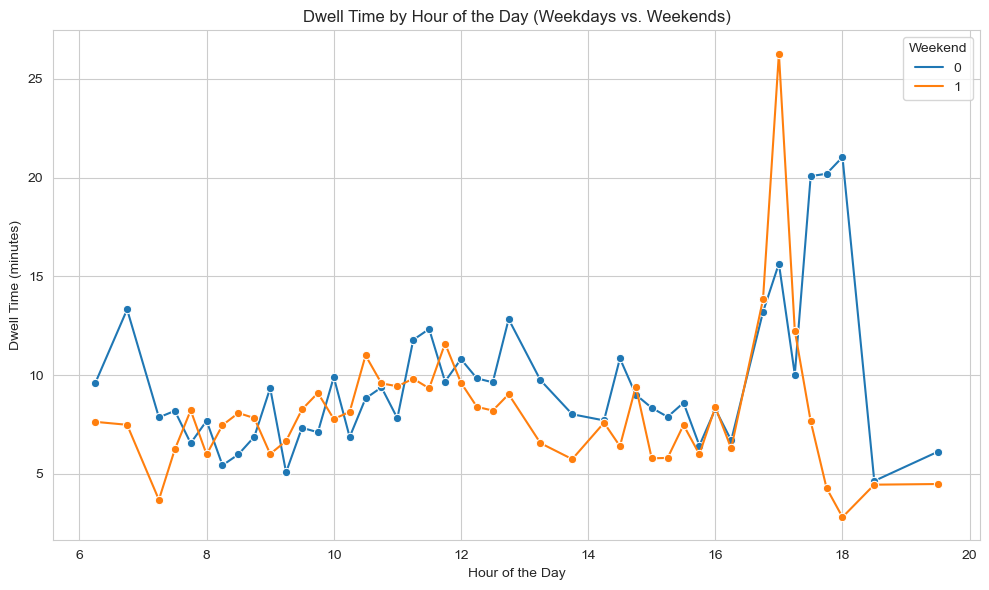

In [162]:
avg_travel_hour_of_day = trip_data.groupby(['hour_of_day', 'weekend'])['dwell_time'].mean().reset_index()

# Set the style of seaborn for better visualization
sns.set_style('whitegrid')

# Plot line graph with different colors for weekends and weekdays
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_travel_hour_of_day, x='hour_of_day', y='dwell_time', hue='weekend', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Dwell Time (minutes)')
plt.title('Dwell Time by Hour of the Day (Weekdays vs. Weekends)')
plt.legend(title='Weekend')
plt.tight_layout()
plt.show()


# 2. Dwell Time by Hour of the Day (Direction)

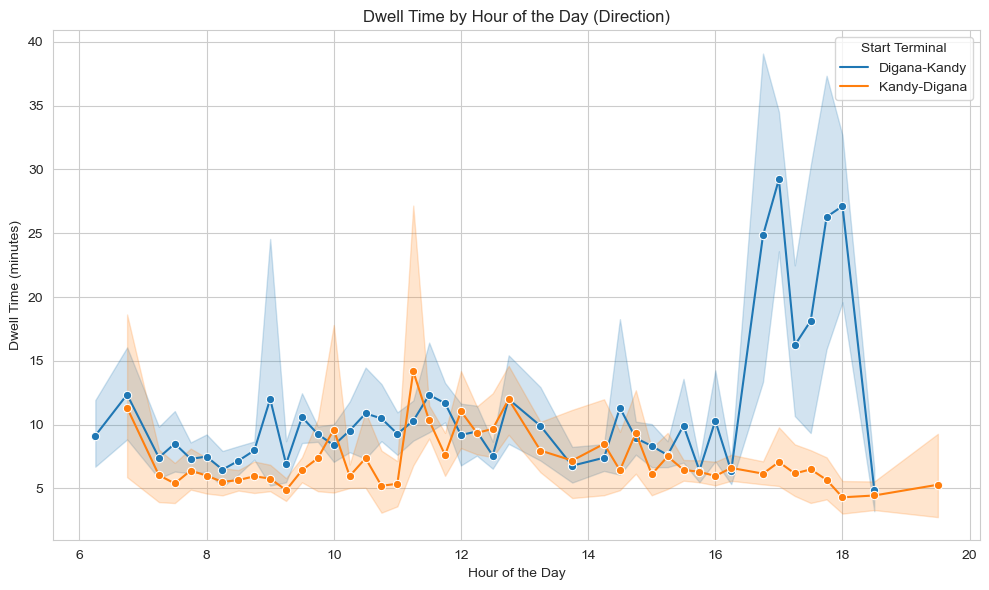

In [163]:
# Set the style of seaborn for better visualization
sns.set_style('whitegrid')

# Plot line graph with different colors for start terminals
plt.figure(figsize=(10, 6))
sns.lineplot(data=trip_data, x='hour_of_day', y='dwell_time', hue='Direction', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Dwell Time (minutes)')
plt.title('Dwell Time by Hour of the Day (Direction)')
plt.legend(title='Start Terminal')
plt.tight_layout()
plt.show()



# 3. Travel Time by Hour of the Day (Direction)

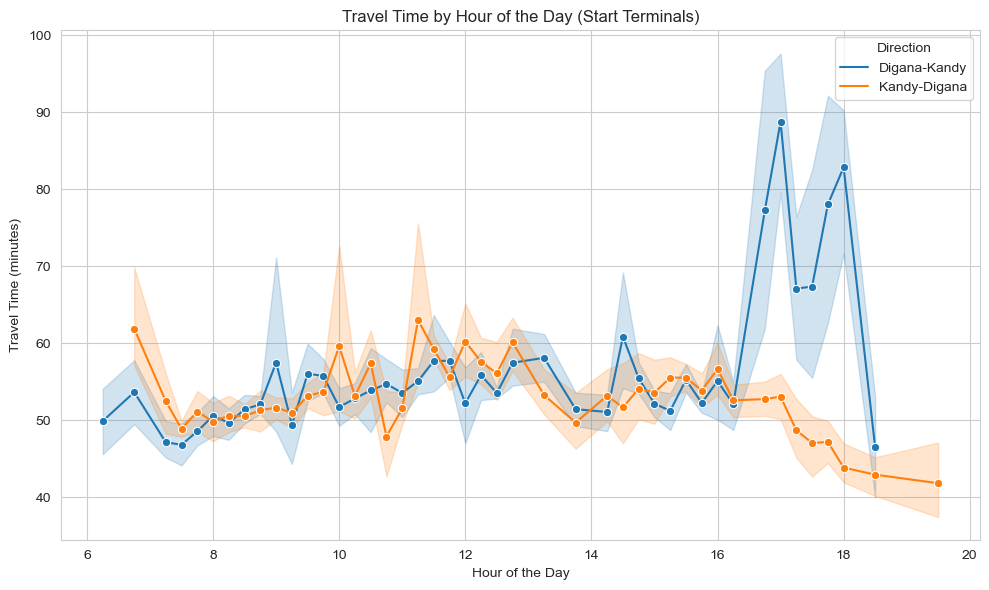

In [164]:
# Set the style of seaborn for better visualization
sns.set_style('whitegrid')

# Plot line graph with different colors for start terminals
plt.figure(figsize=(10, 6))
sns.lineplot(data=trip_data, x='hour_of_day', y='travel_time', hue='Direction', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Travel Time (minutes)')
plt.title('Travel Time by Hour of the Day (Start Terminals)')
plt.legend(title='Direction')
plt.tight_layout()
plt.show()

# 4. Average SITR by Hour of the Day (Direction)

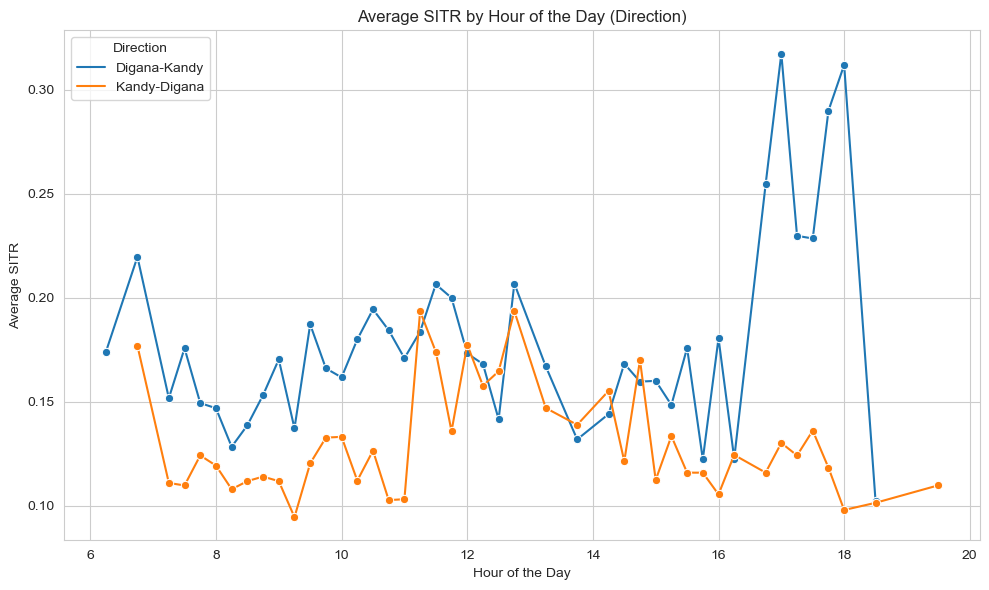

In [165]:
# Line chart showing how the ratio of travel time to dwell time varies over the hour of day.
average_ratios_by_hour = trip_data.groupby(['hour_of_day','Direction'])['SITR'].mean().reset_index()

# Plot line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_ratios_by_hour, x='hour_of_day', y='SITR',hue='Direction', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average SITR')
plt.title('Average SITR by Hour of the Day (Direction)')
plt.legend(title='Direction')
plt.tight_layout()
plt.show()



# List of days in the correct order for plotting
# days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']



# 5. Excess Travel Time by Day of the Week

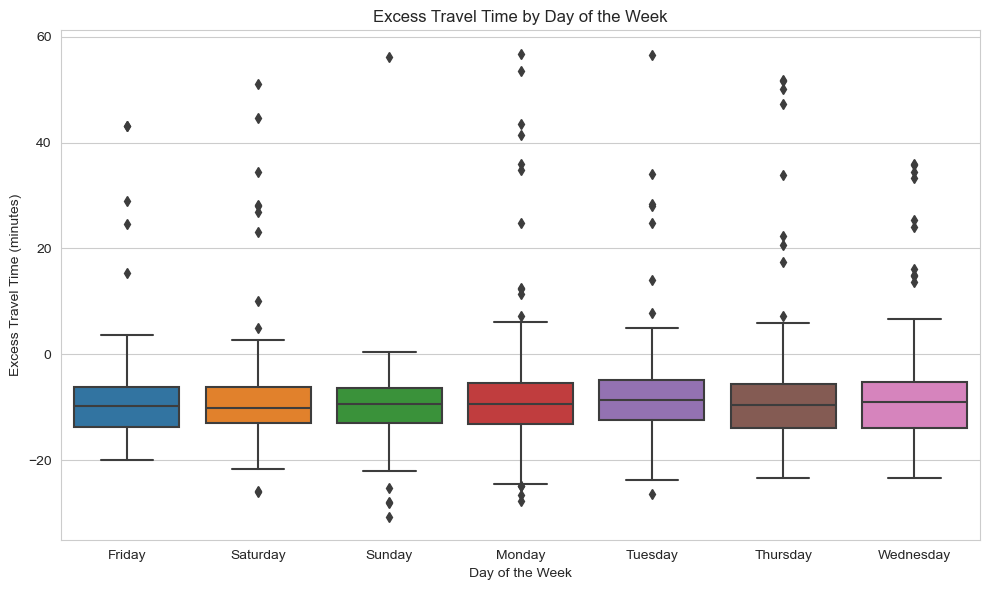

In [166]:
# plot the excess travel time by day of the week using a boxplot

# Set the style of seaborn for better visualization
sns.set_style('whitegrid')


plt.figure(figsize=(10, 6))
sns.boxplot(data=trip_data, x='day_name', y='excess_travel_time')
plt.xlabel('Day of the Week')
plt.ylabel('Excess Travel Time (minutes)')
plt.title('Excess Travel Time by Day of the Week')
plt.tight_layout()


In [167]:
# # Set the style of seaborn for better visualization
# sns.set_style('whitegrid')

# # Calculate average travel time by day of the week
# avg_travel_time_by_day = trip_data.groupby(['day_of_week', 'day_name'])['travel_time'].mean().reset_index()

# # Plot bar chart with different colors for each day_name
# plt.figure(figsize=(10, 6))
# sns.barplot(data=avg_travel_time_by_day, x='day_of_week', y='travel_time', hue='day_name')
# plt.xlabel('Day of the Week')
# plt.ylabel('Average Travel Time (minutes)')
# plt.title('Average Travel Time by Day of the Week')
# plt.legend(title='Day Name')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()